In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

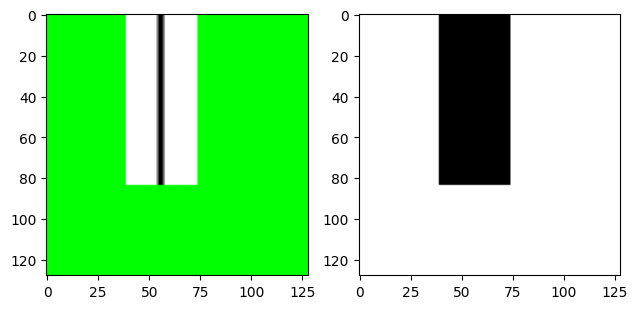

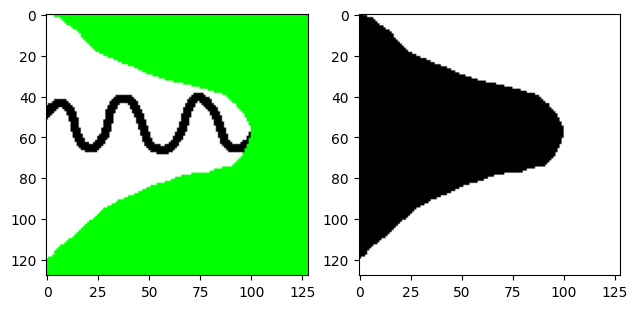

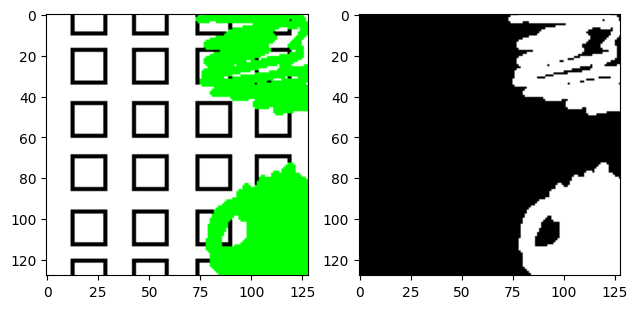

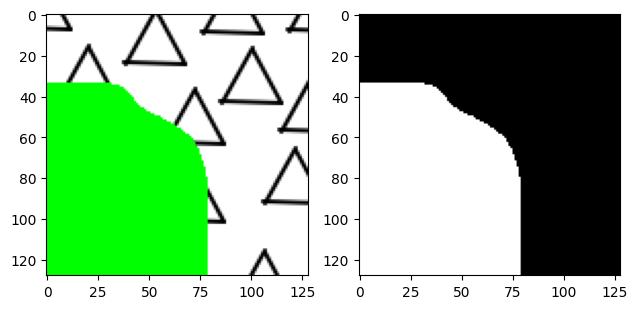

In [3]:
from data import ImageStore, PointDataset, trigonometric_features

store = PointDataset(id_bits=8)
store.load("img/vertical.png")
store.load("img/sine.png")
store.load("img/squares.png")
store.load("img/triangles.png")
store.plot(0)
store.plot(1)
store.plot(2)
store.plot(3)

In [4]:
dl = t.utils.data.DataLoader(store, batch_size=64, shuffle=True, num_workers=2)

In [5]:
from models import ResMLP, BiResMLP, PointModel

model = PointModel(BiResMLP(43, 64, 3, 20))
trainer = pl.Trainer(max_epochs=4)
trainer.fit(model, dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mike/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
/home/mike/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:72: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name  | Type     | Params
--------------------------------

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


In [6]:
trainer = pl.Trainer(max_epochs=4)
trainer.fit(model, dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type     | Params
-----------------------------------
0 | model | BiResMLP | 90.1 K
-----------------------------------
90.1 K    Trainable params
0         Non-trainable params
90.1 K    Total params
0.360     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Add proper logging, save models to DVC, etc.

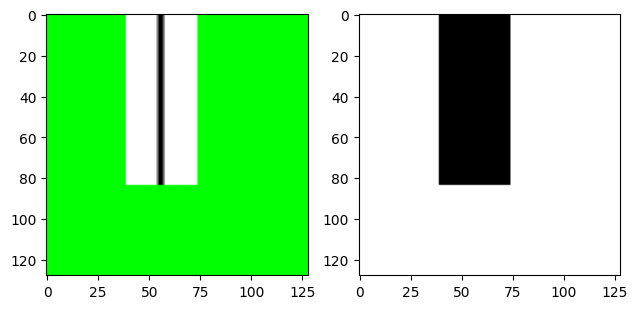

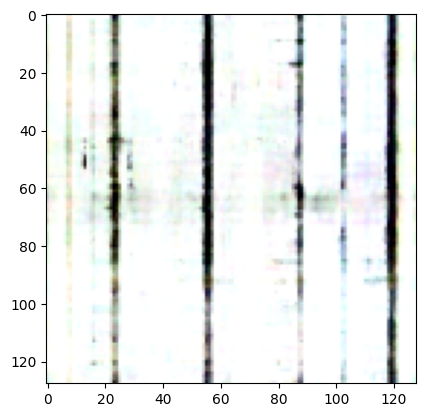

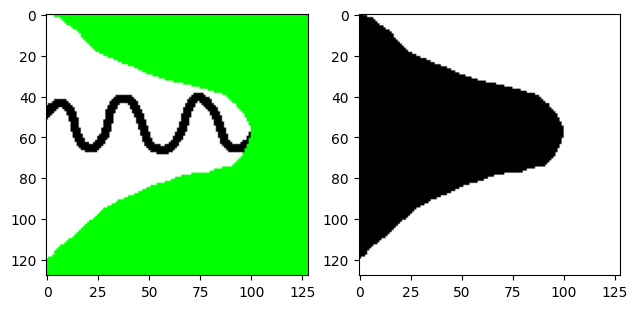

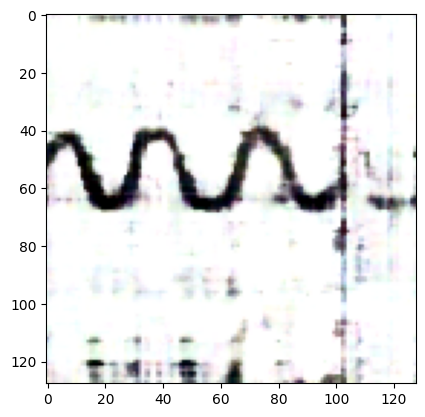

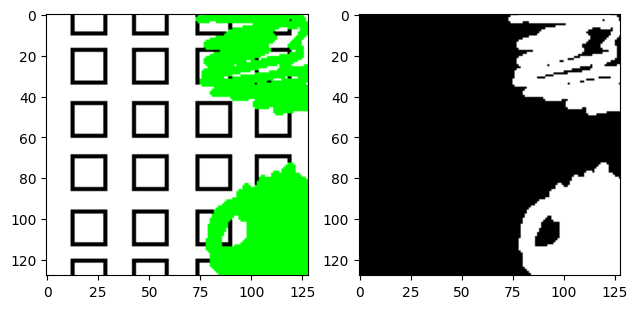

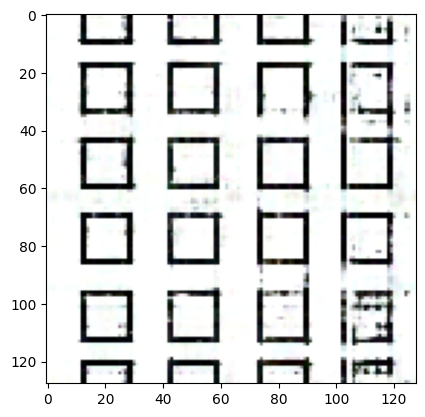

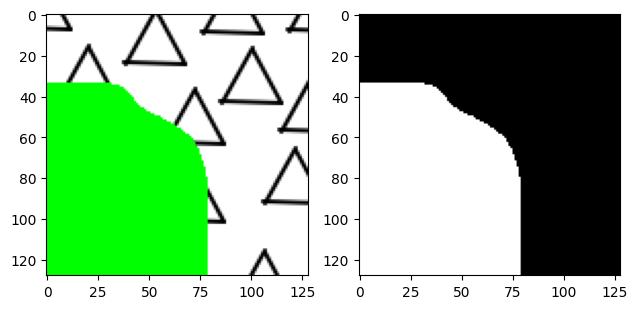

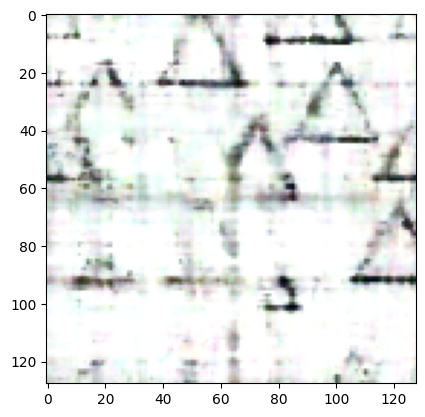

In [8]:
for i in range(4):
    store.plot(i)
    store.predictions(model, i)